<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ TensorFlow version: 2.19.0
✅ Found classes: ['jackfruit leaf', 'mango leaf']
Found 518 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 178s 10s/step - accuracy: 0.8661 - loss: 0.6546 - val_accuracy: 0.7692 - val_loss: 0.5057
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9233 - loss: 0.2512 - val_accuracy: 0.8297 - val_loss: 0.4013
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9443 - loss: 0.1410 - val_accuracy: 0.6868 - val_loss: 0.6857
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9843 - loss: 0.0708 - val_accuracy: 0.7527 - val_loss: 0.5802
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.9755 - loss: 0.0740 - val_accuracy: 0.8077 - val_loss: 0.4192
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9748 - loss: 0.0812 - val_accuracy: 0.6154 - val_loss: 1.0211
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9745 - loss: 0.0743 - val_accuracy: 0.7912 - val_loss: 0.5429
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.9882 - loss: 0.0562 - val_accuracy: 0.6813 - val_los

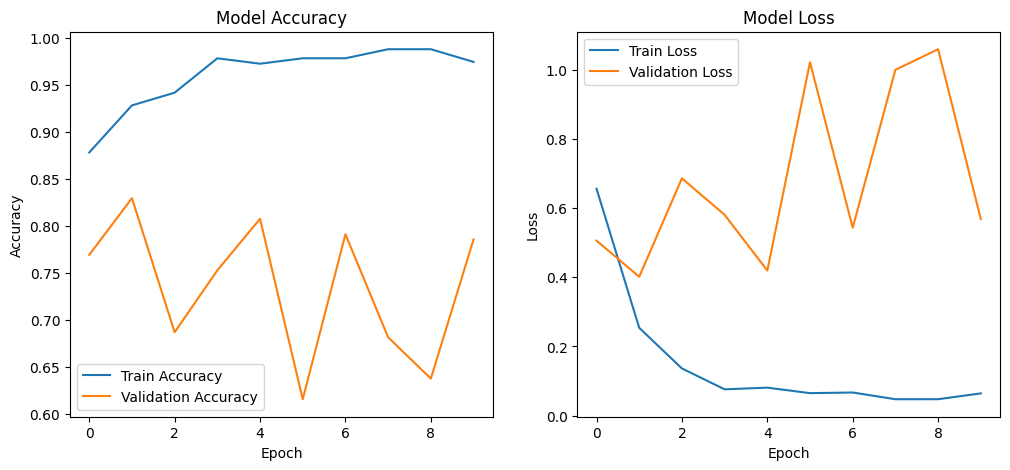

✅ Model saved to Drive.


In [4]:
# ==========================================
# 📦 VGG16 Training on Dataset from Drive
# ==========================================

# --- 1️⃣ Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2️⃣ Define dataset paths ---
# ✅ Change this if your folder name/path differs
dataset_dir = "/content/drive/MyDrive/my_dataset"
train_dir = dataset_dir + "/train"
test_dir  = dataset_dir + "/test"

# --- 3️⃣ Imports ---
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

print("✅ TensorFlow version:", tf.__version__)
print("✅ Found classes:", os.listdir(train_dir))

# --- 4️⃣ Data Preprocessing ---
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# --- 5️⃣ Build VGG16 Model (Transfer Learning) ---
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze base layers so only top layers train
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# --- 6️⃣ Compile Model ---
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- 7️⃣ Train Model ---
epochs = 10  # change as needed

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# --- 8️⃣ Evaluate Model ---
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# --- 9️⃣ Plot Accuracy & Loss ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# --- 🔟 Save Model (Optional) ---
model.save("/content/drive/MyDrive/vgg16_mobile_dataset_model.h5")
print("✅ Model saved to Drive.")
